# Any imports required here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from art import *
from scipy.special import expit, logit # this is for the sigmoid function

FYI: art is a package to print in a different way

Pandas Data injection here

In [2]:
train_data = pd.read_csv("train.csv")


Data properties here

# Image data info
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(42000, 785)

In [5]:
len(train_data.columns[1:])

784

In [35]:
train_data.shape[0]/10

train_data.shape[0]-train_data.shape[0]/10

37800.0

In [39]:
x=train_data[train_data.columns[1:]]
x=x.to_numpy()
y=train_data[train_data.columns[0]]
y=y.to_numpy()
y=y[:,np.newaxis]
y=np.where(y==0, 10, y) 
m=x.shape[0]


In [7]:
#x.describe()

In [8]:
tprint(str(train_data.isnull().sum().sum())) # 0 null values so no cleaning needed

  ___  
 / _ \ 
| | | |
| |_| |
 \___/ 
       



Data Vizualization here

In [9]:
def displayImage(image_data):
    image_data = np.array(image_data).reshape(28,28)
    plt.imshow(image_data, cmap=plt.cm.binary)
    plt.show()
    

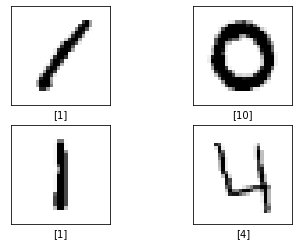

In [10]:
for i in range(4):
    image_data=x[i]
    image_data = np.array(image_data).reshape(28,28)
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image_data, cmap=plt.cm.binary)
    plt.xlabel(str(y[i]))
plt.show()

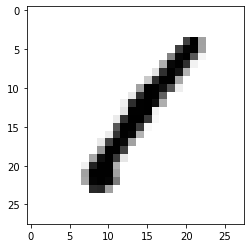

The number is:
 __  _  __ 
| _|/ ||_ |
| | | | | |
| | | | | |
| | |_| | |
|__|   |__|



In [11]:
j=0
displayImage(x[j])
print("The number is:")
tprint(str(y[j]))

Deleted the label column which contains the number associated with the pixels in the row

In [12]:
#del train_data['label']  # you can also use this to drop an column train_data_bias.delete("label",axis=1)

# Neural network implementation starting:

In [13]:
h_layer=25 # number of units in hidden layer
input_layer_size = x.shape[1]
num_labels=10

In [14]:
#Converting the single column outut column in then required format for classification
y10 = np.zeros((m,num_labels))
for i in range(1,num_labels+1):
    y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0) 

## theta random initialization

In [15]:
def theta_init(r,c):
    epsilon = (6**1/2) / (r + c)**1/2
    #epsilon=0.15
    return ((np.random.rand(r,c)*(2*epsilon))-epsilon)

## Sigmoid function

In [18]:
def sigmoid(z):
    
    #res = 1 / (1 + np.exp((-z))) #While using this you will get exp overflow so we are using expit 
    #which is similar to sigmoid
    res=expit(z)
    return res
    

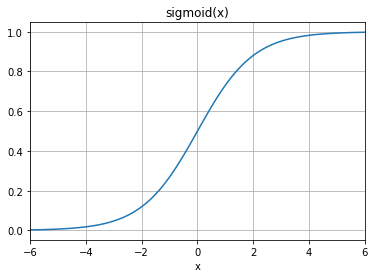

In [19]:
# Sigmoid function working, plot
x_ax = np.linspace(-6, 6, 121)
y_ax = sigmoid(x_ax)
plt.plot(x_ax, y_ax)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('sigmoid(x)')
plt.show()

## Sigmoid with gradient

In [20]:
def sigmoid_grad(inp_vector):
    return sigmoid(inp_vector)*(1-sigmoid(inp_vector))

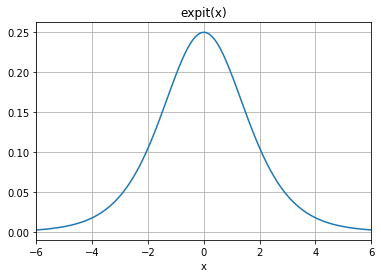

In [21]:
# Sigmoid with gradient function working, plot
x_ax = np.linspace(-6, 6, 121)
y_ax = sigmoid_grad(x_ax)
plt.plot(x_ax, y_ax)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

## Neural network Cost function and backpropagation

In [45]:
def nncost_function(nnparams):
    J=0
    J_reg=0
    lamda=1
    # y=train_data[train_data.columns[0]]
    # y=y.to_numpy()
    # y=y[:,np.newaxis]
    

    theta1=nnparams[:((input_layer_size+1)*h_layer)].reshape(h_layer,input_layer_size+1)
    theta2=nnparams[((input_layer_size+1)*h_layer):].reshape(num_labels,h_layer+1)

    m=x.shape[0]


    bias = np.ones((x.shape[0],1 ))
   
    y=y10.copy()      
    a1=x.copy()
    #train_data_bias.insert(loc=1, column='Bias', value=bias)
    a1 = np.hstack((bias,a1))

    z1 = a1@(theta1.T)
    a2=sigmoid(z1)
    bias2 = np.ones((1,a2.shape[0]))
    a2=np.insert(a2,0,bias2,axis=1).copy()
    
    z2 = a2@(theta2.T)
    a3 = sigmoid(z2)
    hyp=a3.copy()
 
    J= np.sum((((-y)*np.log(hyp))-((1-y)*np.log(1-hyp))))
    J=J/m

    reg_theta1=theta1[:,1:]
    reg_theta2=theta2[:,1:]
    
    reg=((np.sum(reg_theta1**2)+np.sum(reg_theta2**2))*(lamda))/(2*m)
    J_reg=J+reg
    #below computes the backpropagation for gradient descent
    #theta1_grad,theta2_grad = backpropagation(theta1,theta2,y,x) 
    
    #gtheta1,gtheta2 =   backpropagation(theta1,theta2,y,x)
    
    



    theta1=nnparams[:((input_layer_size+1)*h_layer)].reshape(h_layer,input_layer_size+1)
    theta2=nnparams[((input_layer_size+1)*h_layer):].reshape(num_labels,h_layer+1)


    theta1_grad = np.zeros_like(theta1)
    theta2_grad = np.zeros_like(theta2)
    m = x.shape[0]    
    # y10=np.zeros((m,num_labels))
    # y=y10.copy() 
    # for i in range(1,num_labels+1):
    #     y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0)    
    y=y10.copy()        
    

    for i in range(0,m):
        a1 = x[i][:].copy()
        #a1=a1[:,np.newaxis]
        #b=np.ones((1,1))

        a1 = np.hstack((1,a1)) # with bias 

        z2 = theta1@a1

        a2 = sigmoid(z2)

        a2 = np.hstack((1,a2))

        z3 = theta2@a2

        a3 = sigmoid(z3)

        d3 = a3-y[i]

        d2 = ((theta2.T)@d3)*(sigmoid_grad(np.hstack((1,z2))))

        d2 = d2[1:]  
        
        d2 = d2[:,np.newaxis]
        d3 = d3[:,np.newaxis]
        a1 = a1[:,np.newaxis]
        a2 = a2[:,np.newaxis]
        dt1 = d2@(a1.T)
        dt2 = d3@(a2.T)

        theta1_grad = theta1_grad + dt1
        theta2_grad = theta2_grad + dt2
    lamda=1
    theta1_grad[:,1:] = theta1_grad[:,1:] + ((lamda/m)*theta1[:,1:])
    theta2_grad[:,1:] = theta2_grad[:,1:] + ((lamda/m)*theta2[:,1:])
    theta1_grad=theta1_grad/m
    theta2_grad=theta2_grad/m
    
    nngradparams=np.hstack((theta1_grad.ravel(),theta2_grad.ravel()))


    return J_reg,nngradparams


In [42]:
#nnparams - to convert the roll the thetas
theta1 = theta_init(h_layer,x.shape[1]+1)
theta2 = theta_init(10,h_layer+1)
    
nnparams=np.hstack((theta1.ravel(),theta2.ravel()))

In [50]:
def gradientDescentnn(x,y,nnparams,lamda,num_iter,alpha):
    c=[]
    creg=[]
    ite=[]
    theta1=nnparams[:((input_layer_size+1)*h_layer)].reshape(h_layer,input_layer_size+1)
    theta2=nnparams[((input_layer_size+1)*h_layer):].reshape(num_labels,h_layer+1)    
    
    for i in range(num_iter):

        print("Iteration: ",i)
        #ite.append(i)
        nnparams = backpropagation(nnparams)
        #nnparams=np.hstack((theta1.ravel(),theta2.ravel()))
        grad1=nnparams[:((input_layer_size+1)*h_layer)].reshape(h_layer,input_layer_size+1)
        grad2=nnparams[((input_layer_size+1)*h_layer):].reshape(num_labels,h_layer+1)
        cost = nncost_function(nnparams)
        print("cost ",cost )
        #c.append(cost)
        #creg.append(reg_cost)
        theta1=theta1-(alpha*grad1)
        theta2=theta2-(alpha*grad2)
        nnparams=np.hstack((theta1.ravel(),theta2.ravel()))
        # if float(cost) <= 2.5:
        #     alpha=0.08
        #     print("alpha changed to :", alpha)
        # if float(cost) <= 2:
        #     alpha=0.03   
        #     print("alpha changed to :", alpha)
        # if int(cost) == 0:
        #     return theta1,theta2,out
        #     print("alpha changed to :", alpha)        
        # if i==num_iter-1:
        #     inc=int(input("Hii, you are nearing the iterations if u are not satisfied with the cost/learning input by how many iterations you want to increase, if not enter 0: "))
        #     num_iter+=inc
        #     al=float(input("Enter the alpha value with which you want to proceeed"))
        #     alpha=al
    out=[]
    choice= input("press y to predict data:")
    if choice=='y':
        test=pd.read_csv("test.csv")
        test.to_numpy()
        out=predict(test, theta1,theta2)
        generate_output(out)
        # costvsiteration(ite,cost,c,creg)        
    return theta1,theta2,out

def costvsiteration(ite,cost,c,creg):
    plt.plot(ite,c,label="cost without regularization")
    plt.plot(ite,creg,label="cost with regularization")
    plt.legend()
    plt.title("gradient iteration vs Cost Graph")
    plt.xlabel("iteration")
    plt.ylabel("Cost")
    plt.show()

In [27]:
# test data
test=pd.read_csv("test.csv")
test=test.to_numpy()

In [28]:
#this function is to display the learning i.e, the weights of the hidden layer theta1 after traning the network

def displayLearning(theta):
    theta=theta[:,1:]
    for i in range(25):
        image_data= theta[i].reshape(28,28)
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.imshow(image_data)
        
    plt.show()
    


In [29]:

def predict(X,theta1,theta2):
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    a1 = sigmoid(X @ theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ theta2.T) # output layer
    
    return np.argmax(a2,axis=1)+1

In [30]:
#to convert the predicted values to a csv format
def generate_output(out):
    writedata=open("digit_output.csv",'w')
    writedata.write("ImageId"+","+"Label")
    writedata.write("\n")
    for i in range(out.shape[0]):
        if out[i]==10:
            writedata.write(str(i+1)+","+str(0)+"\n")
        else:
        
            writedata.write(str(i+1)+","+str(out[i])+"\n")
    writedata.close()
    


In [31]:
nncost_function(nnparams) # returns the cost for the data

7.058469719309691

In [52]:
ftheta1,ftheta2,out = gradientDescentnn(x,y,nnparams,lamda=1,num_iter=50,alpha=0.1)

Iteration:  0
cost  24.96692489355561
Iteration:  1
cost  19.338153580875808
Iteration:  2
cost  14.464680357776519
Iteration:  3
cost  11.823371198775696
Iteration:  4
cost  10.597512457337706
Iteration:  5
cost  9.652422846424585
Iteration:  6
cost  9.17649858175193
Iteration:  7
cost  8.844830378956665
Iteration:  8
cost  8.479548660809032
Iteration:  9


KeyboardInterrupt: 